# 数据预处理

## 数据读取与探查

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/e-commerce-user-behavior-dataset-for-aarrr/E_commerce.csv


In [2]:
# 加载数据集
filepath = "/kaggle/input/e-commerce-user-behavior-dataset-for-aarrr/E_commerce.csv"
df = pd.read_csv(filepath)

# 查看数据的基本信息
print('数据基本信息：')
df.info()
display(df.describe())

# 查看数据前5行
print("数据前5行：")
display(df.head())

数据基本信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51289 entries, 0 to 51288
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer ID          51289 non-null  object 
 1   Customer Name        51289 non-null  object 
 2   Segment              51289 non-null  object 
 3   City                 51289 non-null  object 
 4   State                51289 non-null  object 
 5   Country              51289 non-null  object 
 6   Region               51215 non-null  object 
 7   Gender               51289 non-null  object 
 8   Age                  51289 non-null  int64  
 9   Education            51289 non-null  object 
 10  Marital Status       51289 non-null  object 
 11  Order ID             51289 non-null  object 
 12  Order Date           51289 non-null  object 
 13  Months               51289 non-null  object 
 14  Ship Mode            51289 non-null  object 
 15  Product Category     51289 n

/tmp/ipykernel_13/3418103730.py:3: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


,Age,Browsing Time (min),Like,Share,Add to Cart
count,51289.000000,51289.000000,51289.000000,51289.000000,51289.000000
mean,31.315428,17.275973,0.567315,0.505274,0.666732
std,11.900634,9.674191,0.495453,0.499977,0.471386
min,18.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,9.300000,0.000000,0.000000,0.000000
50%,28.000000,16.500000,1.000000,1.000000,1.000000
75%,37.000000,24.600000,1.000000,1.000000,1.000000
max,70.000000,40.000000,1.000000,1.000000,1.000000


数据前5行：


,Customer ID,Customer Name,Segment,City,State,Country,Region,Gender,Age,Education,...,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Browsing Time (min),Like,Share,Add to Cart
0,LS-001,Lane Daniels,Consumer,Brisbane,Queensland,Australia,Oceania,Male,22,Associate Degree,...,$140.00,2,0.05,$46.00,$4.60,Medium,14.7,1,1,1
1,IZ-002,Alvarado Kriz,Home Office,Berlin,Berlin,Germany,Central,Male,32,Bachelor,...,$211.00,3,0.03,$112.00,$11.20,Medium,15.0,0,0,1
2,EN-003,Moon Weien,Consumer,Porirua,Wellington,New Zealand,Oceania,Male,21,High School,...,$117.00,5,0.01,$31.20,$3.10,Critical,19.9,1,1,1
3,AN-004,Sanchez Bergman,Corporate,Kabul,Kabul,Afghanistan,Central Asia,Male,22,Bachelor,...,$118.00,2,0.05,$26.20,$2.60,High,15.8,1,1,1
4,ON-005,Rowe Jackson,Corporate,Townsville,Queensland,Australia,Oceania,Male,28,Associate Degree,...,$250.00,1,0.04,$160.00,$16.00,Critical,18.1,1,1,1


## 异常值处理

In [3]:
# 读取数据并指定可疑列类型为字符串
df = pd.read_csv(filepath, dtype={
    'Quantity': str, 
    'Discount': str,
    'Sales': str,
    'Profit': str
})

In [4]:
# 数值列清洗与转换
# 处理销售额（移除$和空格，转换为float）
df['Sales'] = df['Sales'].replace(r'[\$,\s]', '', regex=True)
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce')  # 无法转换的设为NaN

# 处理利润（同上）
df['Profit'] = df['Profit'].replace(r'[\$,\s]', '', regex=True)
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce')

# 处理数量（转换为整数）
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mode()[0] if not df['Quantity'].mode().empty else 1)  # 用众数填充缺失值

# 处理折扣（转换为小数）
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Discount'] = df['Discount'].fillna(0)  # 缺失折扣视为无折扣


In [5]:
print(df.head(5))

  Customer ID    Customer Name      Segment        City       State  \
0      LS-001     Lane Daniels     Consumer    Brisbane  Queensland   
1      IZ-002    Alvarado Kriz  Home Office      Berlin      Berlin   
2      EN-003       Moon Weien     Consumer     Porirua  Wellington   
3      AN-004  Sanchez Bergman    Corporate       Kabul       Kabul   
4      ON-005     Rowe Jackson    Corporate  Townsville  Queensland   

       Country        Region Gender  Age         Education  ...  Sales  \
0    Australia       Oceania   Male   22  Associate Degree  ...  140.0   
1      Germany       Central   Male   32          Bachelor  ...  211.0   
2  New Zealand       Oceania   Male   21       High School  ...  117.0   
3  Afghanistan  Central Asia   Male   22          Bachelor  ...  118.0   
4    Australia       Oceania   Male   28  Associate Degree  ...  250.0   

  Quantity Discount Profit Shipping Cost Order Priority Browsing Time (min)  \
0      2.0     0.05   46.0        $4.60          

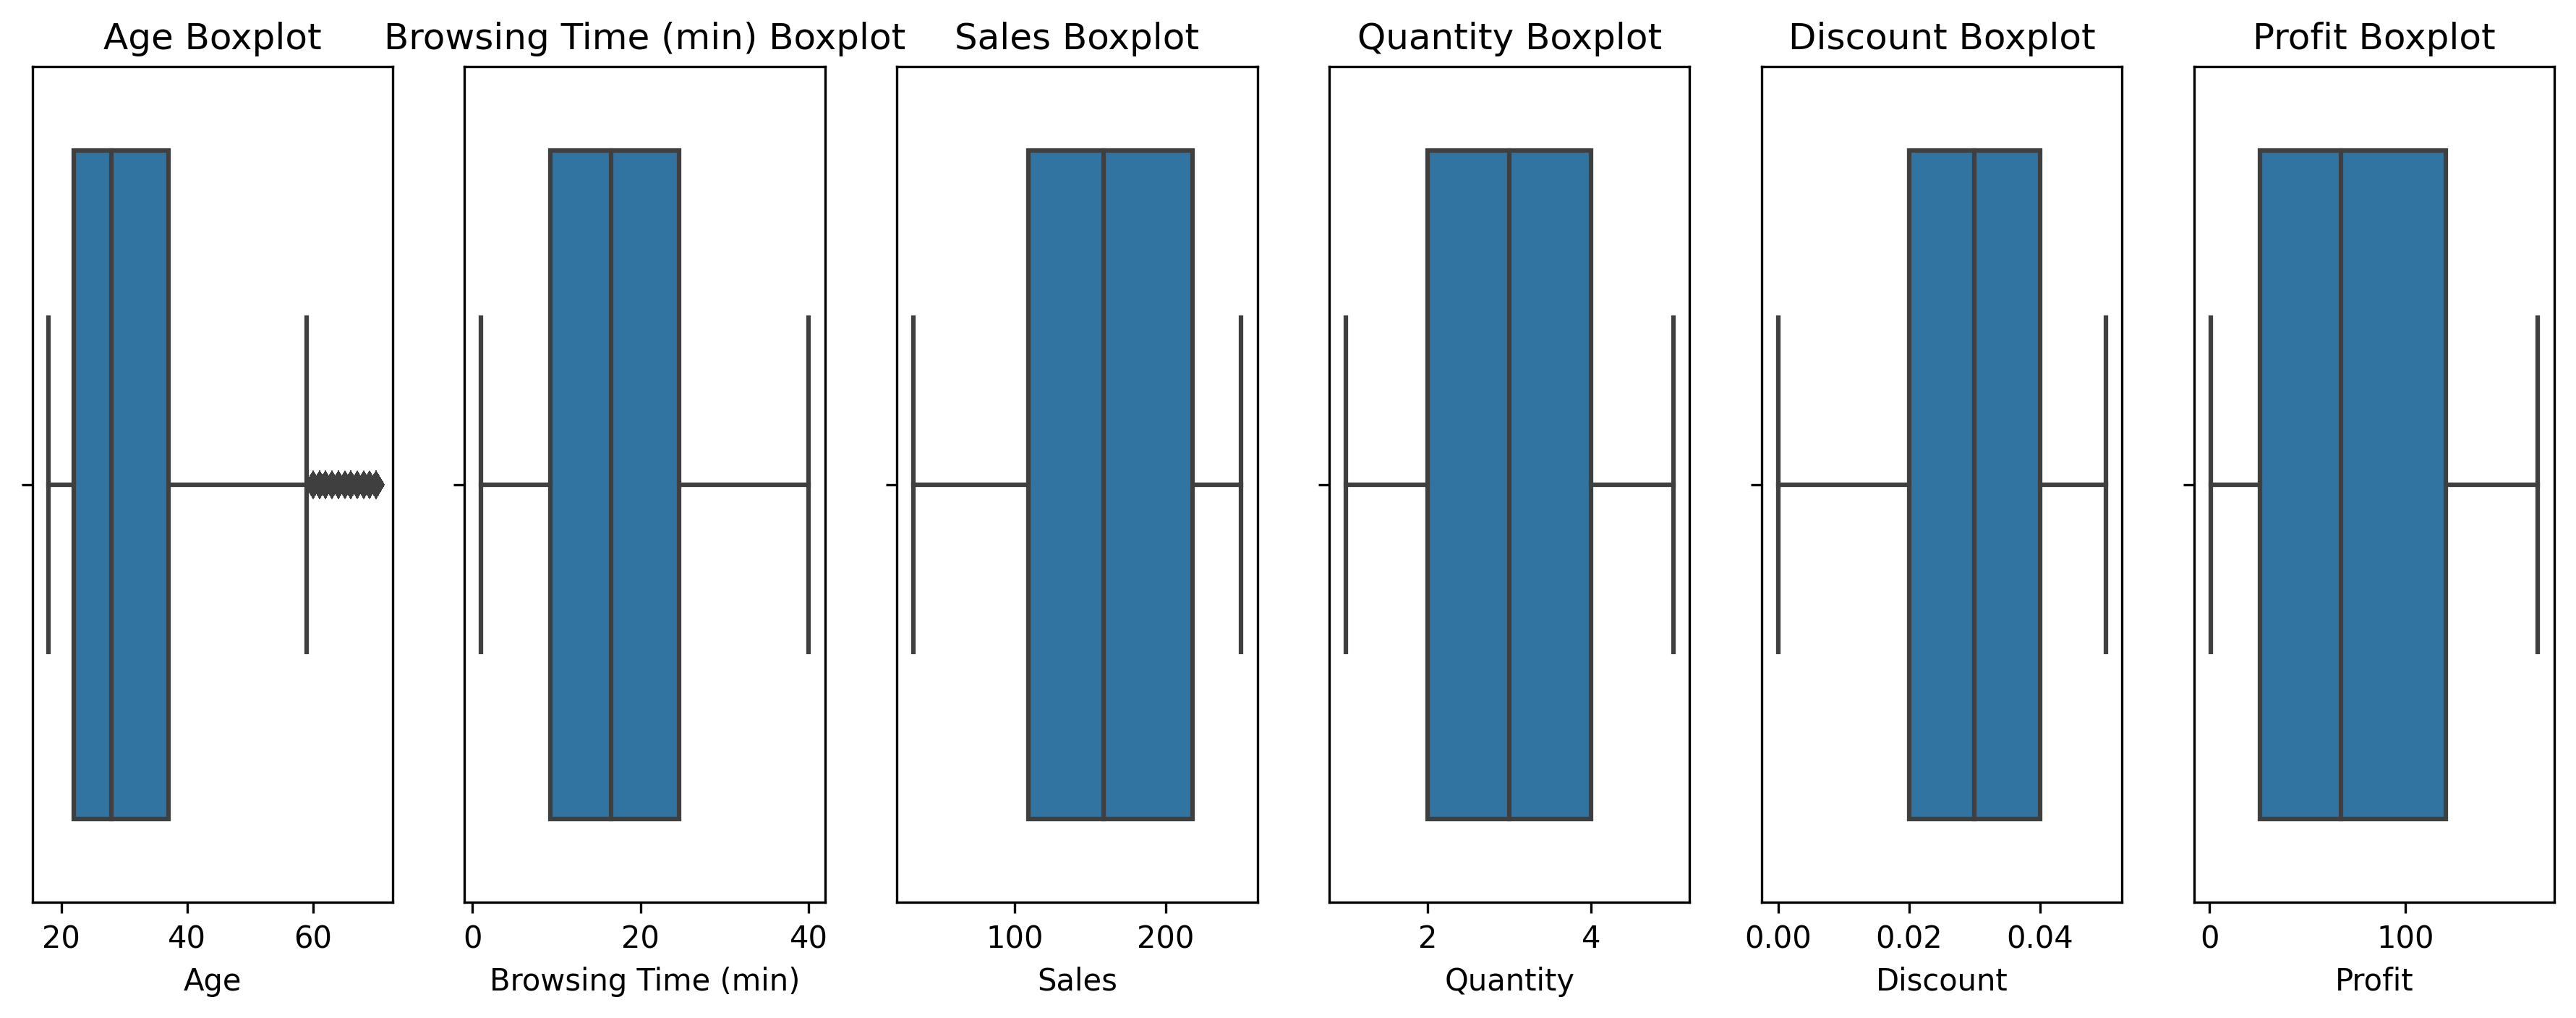

数值型列的描述性统计数据：
            Age  Browsing Time (min)     Sales  Quantity  Discount    Profit
count  51289.00             51289.00  51288.00  51289.00  51289.00  51289.00
mean      31.32                17.28    156.43      3.00      0.03     72.73
std       11.90                 9.67     65.78      1.41      0.01     49.10
min       18.00                 1.00     33.00      1.00      0.00      0.50
25%       22.00                 9.30    109.00      2.00      0.02     25.70
50%       28.00                16.50    159.00      3.00      0.03     67.00
75%       37.00                24.60    218.00      4.00      0.04    120.60
max       70.00                40.00    250.00      5.00      0.05    167.50
Customer ID 的唯一值数量：795
Customer Name 的唯一值数量：795
Segment 的唯一值数量：3
City 的唯一值数量：548
State 的唯一值数量：320
Country 的唯一值数量：84
Region 的唯一值数量：14
Gender 的唯一值数量：2
Education 的唯一值数量：5
Marital Status 的唯一值数量：2
Order ID 的唯一值数量：51273
Order Date 的唯一值数量：664
Months 的唯一值数量：12
Ship Mode 的唯一值数量：5
Product Category 的唯一值

In [6]:
# 设置图片清晰度
plt.rcParams['figure.dpi'] = 300

# 定义需要分析的数值型列
numeric_columns = ['Age', 'Browsing Time (min)', 'Sales','Quantity','Discount','Profit']

# 绘制箱线图查看异常值
fig, axes = plt.subplots(1, len(numeric_columns), figsize=(15, 5))
for i, col in enumerate(numeric_columns):
    sns.boxplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'{col} Boxplot')
plt.show()

# 查看数值型列的描述性统计数据，保留两位小数
print('数值型列的描述性统计数据：')
print(df[numeric_columns].describe().round(2))

# 对 object 类型的列，查看其唯一值数量
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f'{col} 的唯一值数量：{df[col].nunique()}')

## 缺省值处理

In [7]:
# 检查缺失值
missing_values = df.isnull().sum()
print('缺失值数量：')
print(missing_values)

缺失值数量：
Customer ID             0
Customer Name           0
Segment                 0
City                    0
State                   0
Country                 0
Region                 74
Gender                  0
Age                     0
Education               0
Marital Status          0
Order ID                0
Order Date              0
Months                  0
Ship Mode               0
Product Category        0
Product                 0
Sales                   1
Quantity                0
Discount                0
Profit                  0
Shipping Cost           0
Order Priority          2
Browsing Time (min)     0
Like                    0
Share                   0
Add to Cart             0
dtype: int64


In [8]:
# 根据检查结果指定数据类型
# 如果Quantity包含非数值，先以字符串形式读取
df = pd.read_csv(filepath, dtype={'Quantity': str, 'Discount': str})

# 数据清洗和类型转换（避免链式赋值）
# 处理缺失值
df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].mode()[0])
df['Order Priority'] = df['Order Priority'].fillna(df['Order Priority'].mode()[0])

# 再次检查缺失值
missing_values = df.isnull().sum()
print('处理后的缺失值数量：')
print(missing_values)

处理后的缺失值数量：
Customer ID            0
Customer Name          0
Segment                0
City                   0
State                  0
Country                0
Region                 0
Gender                 0
Age                    0
Education              0
Marital Status         0
Order ID               0
Order Date             0
Months                 0
Ship Mode              0
Product Category       0
Product                0
Sales                  0
Quantity               0
Discount               0
Profit                 0
Shipping Cost          0
Order Priority         0
Browsing Time (min)    0
Like                   0
Share                  0
Add to Cart            0
dtype: int64


# AARRR模型建立

## 获客

In [9]:
# 按地区统计用户数量及占比
acquisition_by_region = df.groupby('Region')['Customer ID'].nunique().reset_index()
acquisition_by_region = acquisition_by_region.rename(columns={'Customer ID': '用户数'})
acquisition_by_region['占比'] = acquisition_by_region['用户数'] / acquisition_by_region['用户数'].sum() * 100
acquisition_by_region = acquisition_by_region.sort_values('用户数', ascending=False).head(10)  # 取Top10

# 按国家统计Top5用户来源
acquisition_by_country = df.groupby('Country')['Customer ID'].nunique().reset_index()
acquisition_by_country = acquisition_by_country.rename(columns={'Customer ID': '用户数'}).sort_values('用户数', ascending=False).head(5)

print("Top10用户来源地区：")
print(acquisition_by_region)
print("\nTop5用户来源国家：")
print(acquisition_by_country)

Top10用户来源地区：
            Region  用户数         占比
3          Central  170  21.383648
11           South  104  13.081761
7            North   85  10.691824
9          Oceania   65   8.176101
8       North Asia   58   7.295597
13            West   53   6.666667
12  Southeast Asia   52   6.540881
0           Africa   51   6.415094
5             EMEA   51   6.415094
6             East   48   6.037736

Top5用户来源国家：
          Country  用户数
81  United States  155
26         France   62
4       Australia   58
48         Mexico   57
17          China   50


## 激活

In [10]:
# 定义激活用户：浏览时长>均值 且 至少有一次加购/点赞/分享
avg_browsing = df['Browsing Time (min)'].mean()
df['是否激活'] = (df['Browsing Time (min)'] > avg_browsing) & (
    (df['Add to Cart'] > 0) | (df['Like'] > 0) | (df['Share'] > 0)
)

# 按用户细分（Segment）统计激活率
activation_by_segment = df.groupby('Segment').agg({
    'Customer ID': 'nunique',
    '是否激活': lambda x: (x.sum() / len(x)) * 100
}).reset_index()
activation_by_segment = activation_by_segment.rename(columns={
    'Customer ID': '用户数',
    '是否激活': '激活率(%)'
})

# 激活用户的行为特征
activated_users = df[df['是否激活'] == True]
activation_behavior = pd.DataFrame({
    '平均浏览时长(min)': [activated_users['Browsing Time (min)'].mean()],
    '加购率(%)': [(activated_users['Add to Cart'].sum() / len(activated_users)) * 100],
    '点赞率(%)': [(activated_users['Like'].sum() / len(activated_users)) * 100],
    '分享率(%)': [(activated_users['Share'].sum() / len(activated_users)) * 100]
})

print("各用户细分的激活率：")
print(activation_by_segment)
print("\n激活用户的行为特征：")
print(activation_behavior)

各用户细分的激活率：
       Segment  用户数     激活率(%)
0     Consumer  409  40.530960
1    Corporate  238  41.603474
2  Home Office  148  40.644402

激活用户的行为特征：
   平均浏览时长(min)     加购率(%)     点赞率(%)     分享率(%)
0    26.089678  82.651212  72.595879  66.452013


## 留存

In [11]:
# 统计每个用户的购买次数
user_purchase_count = df.groupby('Customer ID')['Order ID'].nunique().reset_index()
user_purchase_count = user_purchase_count.rename(columns={'Order ID': '购买次数'})

# 计算复购率（购买次数≥2的用户占比）
repurchase_users = user_purchase_count[user_purchase_count['购买次数'] >= 2]
repurchase_rate = (len(repurchase_users) / len(user_purchase_count)) * 100

# 复购用户的特征（按地区）
repurchase_user_ids = repurchase_users['Customer ID'].unique()
repurchase_data = df[df['Customer ID'].isin(repurchase_user_ids)]
repurchase_by_region = repurchase_data.groupby('Region')['Customer ID'].nunique().reset_index()
repurchase_by_region = repurchase_by_region.rename(columns={'Customer ID': '复购用户数'})
repurchase_by_region = repurchase_by_region.sort_values('复购用户数', ascending=False).head(5)

print(f"整体复购率：{repurchase_rate:.2f}%")
print("\n复购用户主要地区（Top5）：")
print(repurchase_by_region)

整体复购率：100.00%

复购用户主要地区（Top5）：
        Region  复购用户数
3      Central    170
11       South    104
7        North     85
9      Oceania     65
8   North Asia     58


## 转化

In [12]:
# 单独处理Sales列（暴力清理所有非数字字符，确保转为数值）
df['Sales'] = df['Sales'].astype(str).str.replace(r'[^\d.]', '', regex=True)  # 只保留数字和小数点
df['Sales'] = pd.to_numeric(df['Sales'], errors='coerce').fillna(0)  # 转数值，缺失填0

# 处理Quantity列，确保为数值类型（若原始有符号/字母，同样清理）
df['Quantity'] = df['Quantity'].astype(str).str.replace(r'[^\d.]', '', regex=True)
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce').fillna(0)

# 暴力清理Profit列（删除$、逗号等非数字字符）
df['Profit'] = df['Profit'].astype(str).str.replace(r'[^\d.-]', '', regex=True)  
df['Profit'] = pd.to_numeric(df['Profit'], errors='coerce').fillna(0)  # 转数值，缺失填0

# 1. 产品维度：计算销售额总和、利润总和、销量总和（Quantity求和）
product_revenue = df.groupby('Product').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Quantity': 'sum'  # 这里改为求和，得到该产品的总销量
}).reset_index()
top_sales_product = product_revenue.sort_values('Sales', ascending=False).head(5)
top_profit_product = product_revenue.sort_values('Profit', ascending=False).head(5)

# 2. 用户维度（保持原逻辑，确保调用的是修复后的df）
user_revenue = df.groupby('Segment').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Customer ID': 'nunique'
}).reset_index()

# 严格计算客单价：总销售额 / 独立用户数（确保无NaN，除数非0）
user_revenue = user_revenue.dropna(subset=['Sales', 'Customer ID'])  # 过滤关键列缺失
user_revenue = user_revenue[user_revenue['Customer ID'] > 0]  # 避免除以0
user_revenue['客单价'] = user_revenue['Sales'] / user_revenue['Customer ID']

print("Top5销售额产品（按总销售额排序）：")
# 只展示Product、Sales总和、Quantity总和，且Quantity保留整数（销量一般是整数）
print(top_sales_product[['Product', 'Sales', 'Quantity']].round({
    'Sales': 2, 
    'Quantity': 0  # Quantity按整数展示
}))  
print("\nTop5利润产品（按总利润排序）：")
print(top_profit_product[['Product', 'Profit']].round(2))
print("\n不同用户细分的收入贡献：")
print(user_revenue[['Segment', 'Sales', 'Profit', '客单价']].round(2))

Top5销售额产品（按总销售额排序）：
          Product     Sales  Quantity
35     T - Shirts  692912.0    8346.0
37    Titak watch  637260.0    8535.0
25  Running Shoes  626080.0    8345.0
19          Jeans  609092.0    8266.0
16   Formal Shoes  595335.0    8438.0

Top5利润产品（按总利润排序）：
          Product    Profit
35     T - Shirts  407717.3
37    Titak watch  355243.2
25  Running Shoes  346339.9
19          Jeans  331899.2
16   Formal Shoes  318379.6

不同用户细分的收入贡献：
       Segment      Sales     Profit       客单价
0     Consumer  4135010.0  1915800.9  10110.05
1    Corporate  2421560.0  1128812.0  10174.62
2  Home Office  1466528.0   685446.0   9908.97


## 传播

In [13]:
import pandas as pd

# ================ 1. 读取数据（指定 dtype 避免混合类型） ================
# 明确指定数值列为字符串（后续统一清洗），避免 mixed types 警告
df = pd.read_csv(
    filepath, 
    dtype={
        'Sales': str, 
        'Profit': str, 
        'Customer ID': str  # 确保用户ID为字符串
    }
)


# ================ 2. 数据清洗（核心：处理货币符号和字符串） ================
def clean_numeric_column(df, col_name):
    """
    清洗货币列：
    1. 移除 $、空格等非数字字符
    2. 转换为 float 类型
    3. 填充缺失值为 0
    """
    df[col_name] = df[col_name].str.replace(r'[^\d.-]', '', regex=True)  # 保留数字、小数点、负号
    df[col_name] = pd.to_numeric(df[col_name], errors='coerce').fillna(0).astype(float)
    return df

# 清洗关键数值列
df = clean_numeric_column(df, 'Sales')
df = clean_numeric_column(df, 'Profit')


# ================ 3. 处理用户ID重复（确保1用户1行） ================
# 去重：保留每个用户最后一次记录（或首行，按业务需求）
df = df.drop_duplicates(subset='Customer ID', keep='last').reset_index(drop=True)


# ================ 4. 规范分享/点赞标记（确保0/1） ================
df['Share'] = df['Share'].fillna(0).astype(int)
df['Share'] = df['Share'].apply(lambda x: 1 if x >= 1 else 0)  # 1=分享过，0=未分享

df['Like'] = df['Like'].fillna(0).astype(int)
df['Like'] = df['Like'].apply(lambda x: 1 if x >= 1 else 0)    # 1=点赞过，0=未点赞


# ================ 5. 核心指标计算（确保数值正确） ================
# 5.1 基础传播指标
total_unique_users = df['Customer ID'].nunique()
shared_unique_users = df[df['Share'] == 1]['Customer ID'].nunique()
liked_unique_users = df[df['Like'] == 1]['Customer ID'].nunique()

print("\n=== 基础传播指标（去重后） ===")
print(f"总独立用户数：{total_unique_users}")
print(f"整体分享率：{shared_unique_users / total_unique_users * 100:.2f}% （{shared_unique_users}/{total_unique_users}）")
print(f"整体点赞率：{liked_unique_users / total_unique_users * 100:.2f}% （{liked_unique_users}/{total_unique_users}）")


# 5.2 分组分享率计算（用户细分、产品、地区）
def calculate_share_rate(group, user_col='Customer ID', share_col='Share'):
    """计算分组内的分享率：分享用户数 / 总用户数"""
    total_users = group[user_col].nunique()
    shared_users = group[group[share_col] == 1][user_col].nunique()
    return (shared_users / total_users) * 100 if total_users != 0 else 0

# 5.2.1 按用户细分（Segment）
share_rate_segment = df.groupby('Segment').apply(
    calculate_share_rate
).reset_index(name='分享率(%)').round(2)

# 5.2.2 按产品（Product）
share_rate_product = df.groupby('Product').apply(
    calculate_share_rate
).reset_index(name='分享率(%)').sort_values('分享率(%)', ascending=False).head(10).round(2)

# 5.2.3 按地区（Region）
share_rate_region = df.groupby('Region').apply(
    calculate_share_rate
).reset_index(name='分享率(%)').sort_values('分享率(%)', ascending=False).head(10).round(2)


# 5.3 分享用户 vs 未分享用户的消费差异
shared_users_df = df[df['Share'] == 1]
non_shared_users_df = df[df['Share'] == 0]

# 计算均值（已清洗为数值类型，可直接计算）
shared_stats = shared_users_df.groupby('Customer ID').agg({
    'Sales': 'mean',
    'Profit': 'mean',
    'Quantity': 'mean'
}).mean().rename('分享用户').round(2)

non_shared_stats = non_shared_users_df.groupby('Customer ID').agg({
    'Sales': 'mean',
    'Profit': 'mean',
    'Quantity': 'mean'
}).mean().rename('未分享用户').round(2)

# 合并并计算差异
share_effect = pd.concat([shared_stats, non_shared_stats], axis=1)
share_effect['差异(%)'] = ((share_effect['分享用户'] / share_effect['未分享用户'] - 1) * 100).round(2)


# ================ 6. 结果输出（确保业务可读性） ================
print("\n=== 2.1 不同用户细分的分享率（去重后） ===")
print(share_rate_segment)

print("\n=== 2.2 Top10高分享产品（去重后） ===")
print(share_rate_product.head(5))  # 展示Top5简化

print("\n=== 2.3 Top10高分享地区（去重后） ===")
print(share_rate_region.head(5))   # 展示Top5简化

print("\n=== 3. 分享用户 vs 未分享用户的消费差异（去重后） ===")
print(share_effect)

/tmp/ipykernel_13/840200786.py:5: DtypeWarning: Columns (18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
/tmp/ipykernel_13/840200786.py:65: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  share_rate_segment = df.groupby('Segment').apply(
/tmp/ipykernel_13/840200786.py:70: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  share_rate_product = df.groupby('Product


=== 基础传播指标（去重后） ===
总独立用户数：795
整体分享率：50.19% （399/795）
整体点赞率：55.09% （438/795）

=== 2.1 不同用户细分的分享率（去重后） ===
       Segment  分享率(%)
0     Consumer   50.61
1    Corporate   49.58
2  Home Office   50.00

=== 2.2 Top10高分享产品（去重后） ===
         Product  分享率(%)
7    Sports Wear   57.14
1   Formal Shoes   54.55
10   Titak watch   52.94
9     T - Shirts   52.70
8          Suits   51.47

=== 2.3 Top10高分享地区（去重后） ===
         Region  分享率(%)
2     Caribbean   72.22
9       Oceania   55.38
4  Central Asia   54.55
8    North Asia   53.45
3       Central   51.48

=== 3. 分享用户 vs 未分享用户的消费差异（去重后） ===
                分享用户       未分享用户     差异(%)
Sales     168.398496  166.340909   1.23697
Profit     79.182707   79.242929 -0.075997
Quantity    2.942356    2.962121 -0.667269
